In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
import re
import string

In [8]:
dataset_test = pd.read_csv("C:/Users/Aishwarya Patil/Desktop/ML Projects/practice/Corona_NLP_test.csv")
dataset_test

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [10]:
dataset_train = pd.read_csv(''"C:/Users/Aishwarya Patil/Desktop/ML Projects/practice/Corona_NLP_train.csv",encoding='latin-1')
dataset_train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


<AxesSubplot:>

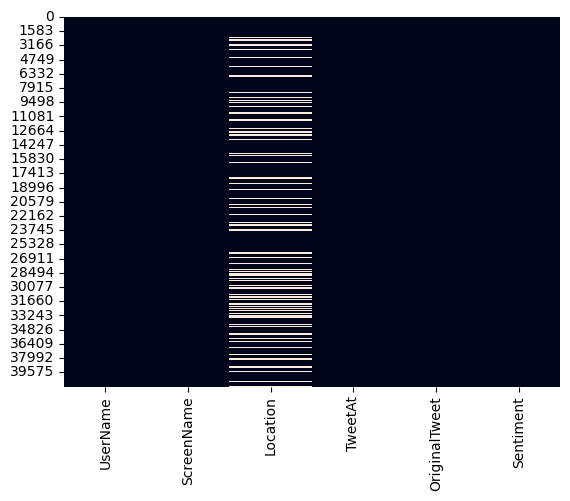

In [12]:
sns.heatmap(dataset_train.isnull(),cbar=False)

In [13]:
dataset_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


<AxesSubplot:>

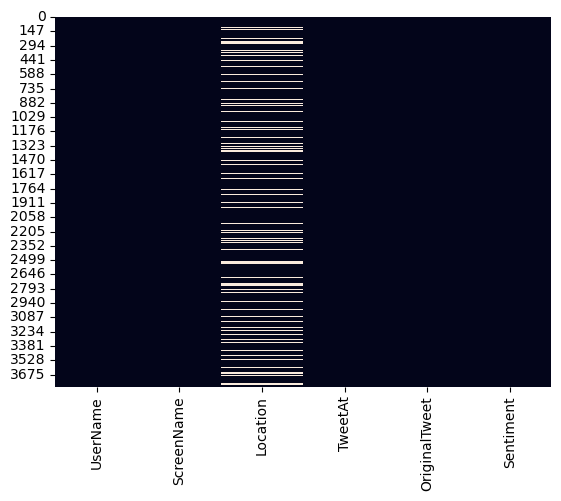

In [14]:
sns.heatmap(dataset_test.isnull(),cbar=False)

In [15]:
dataset_test.groupby('Sentiment').count()

,UserName,ScreenName,Location,TweetAt,OriginalTweet
Sentiment,,,,,
Extremely Negative,592,592,449,592,592
Extremely Positive,599,599,482,599,599
Negative,1041,1041,811,1041,1041
Neutral,619,619,497,619,619
Positive,947,947,725,947,947


In [19]:
dataset_train['char_count'] = dataset_train['OriginalTweet'].apply(lambda x: len(str(x)))

dataset_train['mention_count'] = dataset_train['OriginalTweet'].apply(lambda x: len([c for c in str(x) if c == '@']))
dataset_train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,char_count,mention_count
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,3
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,0
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,0
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306,0
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,0
...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,102,0
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,138,0
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,136,2
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,111,0


In [18]:
dataset_test['char_count'] = dataset_test['OriginalTweet'].apply(lambda x: len(str(x)))

dataset_test['mention_count'] = dataset_test['OriginalTweet'].apply(lambda x: len([c for c in str(x) if c == '@']))
dataset_test

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,char_count,mention_count
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,228,0
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,193,0
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,73,0
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,318,0
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,252,0
...,...,...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,127,0
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,213,0
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,185,2
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative,174,0


In [20]:
new = dataset_train["TweetAt"].str.split("-", n = 2, expand = True)
dataset_train['year']=new[2].astype(int)
dataset_train['month']=new[1].astype(int)
dataset_train['day']=new[0].astype(int)
dataset_train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,char_count,mention_count,year,month,day
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,3,2020,3,16
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,0,2020,3,16
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,0,2020,3,16
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306,0,2020,3,16
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,0,2020,3,16
...,...,...,...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,102,0,2020,4,14
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,138,0,2020,4,14
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,136,2,2020,4,14
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,111,0,2020,4,14


In [21]:
new = dataset_test["TweetAt"].str.split("-", n = 2, expand = True)
dataset_test['year']=new[2].astype(int)
dataset_test['month']=new[1].astype(int)
dataset_test['day']=new[0].astype(int)
dataset_test

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,char_count,mention_count,year,month,day
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,228,0,2020,3,2
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,193,0,2020,3,2
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,73,0,2020,3,2
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,318,0,2020,3,2
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,252,0,2020,3,3
...,...,...,...,...,...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,127,0,2020,3,16
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,213,0,2020,3,16
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,185,2,2020,3,16
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative,174,0,2020,3,16


In [23]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

dataset_test['OriginalTweet'] =dataset_test['OriginalTweet'].apply(lambda text: cleaning_stopwords(text))

dataset_train['OriginalTweet'] = dataset_train['OriginalTweet'].apply(lambda text: cleaning_stopwords(text))

In [25]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)
dataset_train['OriginalTweet']= dataset_train['OriginalTweet'].apply(lambda x: cleaning_URLs(x))

dataset_test['OriginalTweet']= dataset_test['OriginalTweet'].apply(lambda x: cleaning_URLs(x))

In [27]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset_train['OriginalTweet']= dataset_train['OriginalTweet'].apply(lambda x: cleaning_punctuations(x))

dataset_test['OriginalTweet']= dataset_test['OriginalTweet'].apply(lambda x: cleaning_punctuations(x))

In [29]:
def cleaning_numbers(data):
    return re.sub('[0-9]+','', data)
dataset_train['OriginalTweet']= dataset_train['OriginalTweet'].apply(lambda x: cleaning_numbers(x))

dataset_test['OriginalTweet']= dataset_test['OriginalTweet'].apply(lambda x: cleaning_numbers(x))

In [30]:
dataset_train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,char_count,mention_count,year,month,day
0,3799,48751,London,16-03-2020,MeNyrbie PhilGahan Chrisitv,Neutral,111,3,2020,3,16
1,3800,48752,UK,16-03-2020,advice Talk neighbours family exchange phone n...,Positive,237,0,2020,3,16
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia Woolworths give elderly ...,Positive,131,0,2020,3,16
3,3802,48754,NaN,16-03-2020,My food stock one empty PLEASE panic THERE WIL...,Positive,306,0,2020,3,16
4,3803,48755,NaN,16-03-2020,Me ready go supermarket COVID outbreak Not Im ...,Extremely Negative,310,0,2020,3,16
...,...,...,...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering stock supermarket shel...,Neutral,102,0,2020,4,14
41153,44952,89904,NaN,14-04-2020,Response complaint provided citing COVID relat...,Extremely Negative,138,0,2020,4,14
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough KameronWilds rati...,Positive,136,2,2020,4,14
41155,44954,89906,NaN,14-04-2020,Is wrong smell hand sanitizer starting turn on...,Neutral,111,0,2020,4,14


In [31]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataset_train['OriginalTweet'] = dataset_train['OriginalTweet'].apply(tokenizer.tokenize)

dataset_test['OriginalTweet'] = dataset_test['OriginalTweet'].apply(tokenizer.tokenize)

In [33]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    data = [st.stem(word) for word in data]
    return data
dataset_train['OriginalTweet']= dataset_train['OriginalTweet'].apply(lambda x: stemming_on_text(x))

dataset_test['OriginalTweet']= dataset_test['OriginalTweet'].apply(lambda x: stemming_on_text(x))

In [35]:
dataset_train['Sentiment']=dataset_train['Sentiment'].replace('Extremely Positive','Positive')
dataset_train['Sentiment']=dataset_train['Sentiment'].replace('Extremely Negative','Negative')

dataset_test['Sentiment']=dataset_test['Sentiment'].replace('Extremely Positive','Positive')
dataset_test['Sentiment']=dataset_test['Sentiment'].replace('Extremely Negative','Negative')

In [37]:
train1=dataset_train
train1.Sentiment=train1.Sentiment.replace('Neutral',1)
train1.Sentiment=train1.Sentiment.replace('Positive',2)
train1.Sentiment=train1.Sentiment.replace('Negative',0)

In [39]:
train=dataset_train.drop(columns=['ScreenName','Location','TweetAt','year'])
test=dataset_test.drop(columns=['ScreenName','Location','TweetAt','year'])

In [40]:
Y_train=train['Sentiment']
Y_test=test['Sentiment']
X_train=train.drop("Sentiment",axis=1)
X_test=test.drop("Sentiment",axis=1)

In [41]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(41157, 6) (41157,) (3798, 6) (3798,)


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU,SimpleRNN
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [43]:
Y_train

0        1
1        2
2        2
3        2
4        0
        ..
41152    1
41153    0
41154    2
41155    1
41156    0
Name: Sentiment, Length: 41157, dtype: int64

In [44]:
X=X_train.OriginalTweet
Y=Y_train

In [45]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
word_index = tok.word_index
sequences_matrix

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,   41, 1039,   98],
       [   0,    0,    0, ...,  122,    1,   88],
       ...,
       [   0,    0,    0, ...,   28,   29,  301],
       [   0,    0,    0, ...,    2,    1,    2],
       [   0,    0,    0, ...,  772,    1,  255]])

In [46]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y)
Y=le.transform(Y)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, Y, test_size=0.3, random_state=2)

In [48]:
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     200,
                     input_length=max_len))
model.add(SimpleRNN(200))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss =SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
    
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 200)          9650200   
                                                                 
 simple_rnn (SimpleRNN)      (None, 200)               80200     
                                                                 
 dense (Dense)               (None, 3)                 603       
                                                                 
Total params: 9,731,003
Trainable params: 9,731,003
Non-trainable params: 0
_________________________________________________________________


In [49]:
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
def roc_auc(predictions,target):
    '''
    This methods returns the AUC Score when given the Predictions
    and Labels
    '''
    
    fpr, tpr, thresholds = metrics.roc_curve(target, predictions)
    roc_auc = metrics.auc(fpr, tpr)
    return roc_auc

In [50]:
model.fit(X_train, Y_train, epochs=10) 

Epoch 1/10
901/901 [==============================] - 299s 331ms/step - loss: 0.9039 - accuracy: 0.5595
Epoch 2/10
901/901 [==============================] - 306s 340ms/step - loss: 0.8922 - accuracy: 0.5959
Epoch 3/10
901/901 [==============================] - 309s 343ms/step - loss: 0.8558 - accuracy: 0.6181
Epoch 4/10
901/901 [==============================] - 350s 389ms/step - loss: 0.8843 - accuracy: 0.6032
Epoch 5/10
901/901 [==============================] - 29580s 33s/step - loss: 0.7636 - accuracy: 0.6853
Epoch 6/10
901/901 [==============================] - 309s 343ms/step - loss: 0.7584 - accuracy: 0.6852
Epoch 7/10
901/901 [==============================] - 321s 356ms/step - loss: 0.6904 - accuracy: 0.7285
Epoch 8/10
901/901 [==============================] - 320s 356ms/step - loss: 0.5943 - accuracy: 0.7854
Epoch 9/10
901/901 [==============================] - 326s 362ms/step - loss: 0.5751 - accuracy: 0.7949
Epoch 10/10
901/901 [==============================] - 321s 356m

In [51]:
Y_test

array([2, 0, 0, ..., 0, 2, 0], dtype=int64)

In [52]:
scores = model.predict(X_test)
scores

386/386 [==============================] - 39s 99ms/step


array([[0.0531092 , 0.19259308, 0.82062984],
       [0.84351265, 0.3719801 , 0.43950304],
       [0.93519217, 0.50012565, 0.68954414],
       ...,
       [0.35218167, 0.54352874, 0.6398644 ],
       [0.054679  , 0.21489424, 0.8532217 ],
       [0.62432283, 0.21171573, 0.5965647 ]], dtype=float32)

In [53]:
score=[]
for s in scores:
    score+=[int(np.where(s == s.max())[0])]
score

[2,
 0,
 0,
 2,
 0,
 2,
 2,
 1,
 2,
 2,
 1,
 0,
 0,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 0,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 1,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
